In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

In [4]:
def k(A,E,T):
    R = 8.314
    return A*np.exp(-E/(R*T))

In [5]:
def F0(k,t):
    return k*t

In [6]:
import math

def g1(T, A, E, beta):
    R = 8.314
    c = math.log(A * E / (beta * R)) + 3.63504095 - 1.89466100 * math.log(E) - 1.00145033 * (E / (R * T))
    return T**(1.89466100)*np.exp(c)


In [7]:
def alpha1(A, E, beta):
    R = 8.314
    plt.figure(1)
    T = np.linspace(273, 1500, num=100)
    c =  g1(T, A, E, beta)
    a = 1 - np.exp(-c)
    u_min = round(E/(R*T[-1]))
    u_max = round(E/(R*T[0]))
    T_max = round(E/(R*13))
    plt.title(f"u_min={u_min} , u_max={u_max} , T_max={T_max}")
    plt.plot(T, a)
    plt.show()


interact(alpha1, E=(10e3, 120e3), A=(1,10e6), beta=(1/60,100/60))

interactive(children=(FloatSlider(value=5000000.5, description='A', max=10000000.0, min=1.0), FloatSlider(valu…

<function __main__.alpha1(A, E, beta)>

In [8]:
def dalpha(A, E, beta):
    R = 8.314
    plt.figure(1)
    T = np.linspace(273, 800, num=1000)
    c =  g(T, A, E, beta)
    # a = 1 - np.exp(-c)
    a = c / (c+1)
    # a = c
    a[a > 1] = 0
    u_min = round(E/(R*T[-1]))
    u_max = round(E/(R*T[0]))
    T_max = round(E/(R*13))
    da = np.diff(a) / np.diff(T)
    plt.title(f"u_min={u_min} , u_max={u_max} , T_max={T_max}")
    plt.plot(T[1:], da)
    plt.show()
    
interact(dalpha, E=(10e3, 120e3), A=(100,10e6), beta=(1/60,100/60))

<Figure size 640x480 with 0 Axes>

interactive(children=(FloatSlider(value=5000050.0, description='A', max=10000000.0, min=100.0), FloatSlider(va…

<function __main__.dalpha(A, E, beta)>

In [9]:
def alpha2(A, E, beta):
    R = 8.314
    plt.figure(1)
    T = np.linspace(273, 1500, num=1000)
    c =  g(T, A, E, beta)
    a = 1 - np.exp(-c)
    u_min = round(E/(R*T[-1]))
    u_max = round(E/(R*T[0]))
    T_max = round(E/(R*13))
        # Conversion thresholds (modify these as needed)
    alpha_onset = 0.05  # 1% conversion
    alpha_offset = 0.95  # 99% conversion

    # Find indices of threshold crossings
    onset_idx = np.where(a >= alpha_onset)[0][0]  # Index of first occurrence above threshold
    offset_idx = np.where(a >= alpha_offset)[-1][0]  # Index of last occurrence above threshold

    # Extract onset and offset temperatures
    T_onset = T[onset_idx]
    T_offset = T[offset_idx]
    
    plt.title(f"u_min={u_min} , u_max={u_max} , T_max={T_max}")
    plt.plot(T, a)
    plt.axvline(x=T_onset, color='r', linestyle='dashed')
    plt.axvline(x= T_offset, color='r', linestyle='dashed')
    plt.show()


interact(alpha2, E=(10e3, 120e3), A=(100,10e6), beta=(1/60,100/60))

<Figure size 640x480 with 0 Axes>

interactive(children=(FloatSlider(value=5000050.0, description='A', max=10000000.0, min=100.0), FloatSlider(va…

<function __main__.alpha2(A, E, beta)>

## Reaction Kinetic Modelling

### Rate of a Solid State Reaction

Following equation describes the rate of a solid state reaction in the terms of the conversion. This is called the *isothermal reaction rate*.

$$\frac{d\alpha}{dt} = Ae^{-\frac{E_a}{RT}}f(\alpha) \tag{eq.1}$$

But DSC Signals have temperature ($T$) as the independent variable. Therefore we need to obtain the reaction rate with respect to temperate. this is called non-isothermal reaction rate.

From chain rule;
$$\frac{d\alpha}{dT} = \frac{d\alpha}{dt} \frac{dt}{dT}$$




If the heating rate $\frac{dT}{dt}$ assumed to be constant, and let it be $\beta$;
$$\frac{d\alpha}{dT} = \frac{d\alpha}{dt} \frac{1}{\beta}$$

from eq.1;
$$\frac{d\alpha}{dT} = \frac{A}{\beta}e^{-\frac{E_a}{RT}}f(\alpha) \tag{eq.2}$$

Separating variables and integrating eq.2,

$$\int_{0}^{\alpha}\frac{1}{f(\alpha)} d\alpha=  \frac{A}{\beta} \int_{0}^{T} e^{-\frac{E_a}{RT}} dT$$
$$g(\alpha) =  \frac{A}{\beta} \, \Psi(T,E_a) \tag{eq.2}$$

 where $g(\alpha)  = \int_{0}^{\alpha}\frac{1}{f(\alpha)} d\alpha$ and  $ \Psi(T,E_a) = \int_{0}^{T} e^{-\frac{E_a}{RT}} dT$

But the problem is that $\Psi$ cannot be directly computed since the integral  $\int_{0}^{T} e^{-\frac{E_a}{RT}} dT$ cannot be solved analytically. Therefore an approximation will be used for following calculations.

From integration by parts,

$$\Psi(T,E_a) = \int_{0}^{T} e^{-\frac{E_a}{RT}} dT  = Te^{-\frac{E_a}{RT}}\Big|_{0}^{T} -  \frac{E_a}{R} \int_{0}^{T} \frac{e^{-\frac{E_a}{RT}}}{T} dT$$
$$\Psi(T,E_a) = Te^{-\frac{E_a}{RT}} - \frac{E_a}{R} E_1\left({E_a}/{RT}\right)$$

Where $E_1$ is the Exponential integral E1.

Therefore;

$$g(\alpha) =  \frac{A}{\beta}\Psi(T,E_a) = \frac{A}{\beta}\left(Te^{-\frac{E_a}{RT}} - \frac{E_a}{R} E_1({E_a}/{RT})\right) = G(T,E_a, A, \beta) \tag{eq.3}$$


Assuming $g^{-1}$ exists; 
$$\alpha = g^{-1}\left\{G(T,E_a,A, \beta)\right\} \tag{eq.4}$$

for models that $g^{-1}$ does not exists, $\alpha$ can be determined solving the eq.3 numerically. 

Taking reaction heat as $Q_r$, for a given moment DSC signal can be written as;
$$dsc = \Delta C_p \frac{dT}{dt} + Q_r \frac{d\alpha}{dt}$$
$$dsc = \Delta C_p \frac{dT}{dt} + Q_r \frac{d\alpha}{dT}\frac{dT}{dt}$$
$$dsc = \frac{dT}{dt}\left(\Delta C_p + Q_r \frac{d\alpha}{dT}\right) = \beta\left(\Delta C_p + Q_r \frac{d\alpha}{dT}\right)$$

Now consider the $\Delta C_p$

Assuming total mass change in the reaction is $\Delta m$;

$$\Delta C_p = C_p^{S} - C_p^{R}$$
$$\Delta C_p = \left\{(1-\alpha)m_ic_p^{r} + \alpha m_fc_p^{p}\right\} - m_Rc_p^{R}$$

Assume a reaction;

$$\sum_{i=1}^a r_iR_i \rightarrow \sum_{j=1}^b p_jP_j$$

Let's take $m_{i}$, $M_{i}$ and $n_{i}$ be the initial mass, molar mass, and number of moles of reactants respectively.

Let's take $m_j$, $M_j$ and $n_j$ be the mass, molar mass, and number of moles of reactants respectively.

$$\gamma = \min{\left\{\frac{n_i}{r_i}\right\}} = \min{\left\{\frac{m_i}{M_ir_i}\right\}} $$



Consider the mass of the $i^{th}$ reactant $m_i^{\alpha}$ at $\alpha$ conversion;

$$m_i^{\alpha} = m_i-M_ir_i\gamma\alpha$$

Consider the mass of the $j^{th}$ product $m_j^{\alpha}$ at $\alpha$ conversion;

$$m_j^{\alpha} = m_j+M_jp_j\gamma\alpha$$

$$  s_k = \left\{
\begin{array}{ll}
      0 & ;k = \text{gas} \\
      1 & ;k = \text{other states} \\
\end{array} 
\right. $$

Therefore;

$$C_p^S = \sum_{i=1}^a s_im_i^{\alpha}c_i + \sum_{j=1}^b s_jm_j^{\alpha}c_j$$

In [10]:
from scipy.special import exp1

def G(T,Ea, A, beta):
    R = 8.314
    return (A/beta)*(T*np.exp(-Ea/(R*T))-(Ea/R)*exp1(Ea/R*T))

In [11]:
def F0(g):
    return np.minimum(g,np.ones(g.shape))

def F1(g):
    return 1 - np.exp(-g)

def F2(g):
    return g / (g+1)


In [12]:
def Cp(c,T):
    T = T/1000
    return c[0] + c[1]*T +c[2]*T**2 + c[3]*T**3 + c[4]*T**-2

In [13]:
def alpha(A, Ea, beta, T):
    return F2(G(T, Ea, A, beta))

In [14]:
def dalpha(a,T):
    return np.diff(a) / np.diff(T)

Text(0, 0.5, 'dQ/dt (W)')

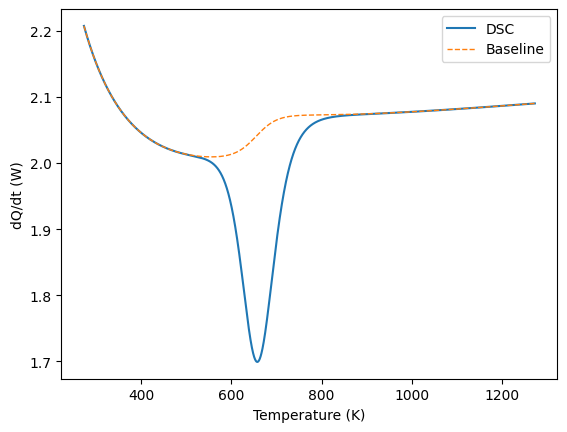

In [25]:
a, b,  c,  d,  e,  m,  M,  r,  s = [i for i in range(9)]
# Define the reactants as a 2D list
react = np.array([
   # a, b, c, d, e, m, M, r, s  
    [55, 13, 5e-1,5e-2, 1, 20e-3, 56, 1, 1],
])

prod  = np.array([
    [65, 4, -5e-1,-5e-2, 8e-1, 10e-3, 56, 1, 1],
])

Ea = 150e3
A  = 1e9
beta = 60/60
T = np.arange(273,1273,0.25)
a = alpha(A, Ea, beta, T)
da = dalpha(a,T)


gamma = float('inf')
for R in react:
    gamma = min(gamma, R[m]/(R[M]*R[r]))


cr = 0   
for R in react:
    mr = R[m]- R[M]*R[r]*gamma*a
    cr += R[s]*mr*Cp(R[:5],T)

cp = 0   
for P in prod:
    mp = P[m]+ P[M]*P[r]*gamma*a
    cp += P[s]*mp*Cp(P[:5],T)
    
Cs = cr + cp
Cr = 0
delta_Cp = Cs-Cr
Qr = gamma*-90e3

base = (beta*delta_Cp)[1:]
dsc = ((beta*delta_Cp)[1:] + beta*Qr*da)

plt.plot(T[1:],dsc, label="DSC" )
plt.plot(T[1:],base,linewidth=1,linestyle='dashed', label="Baseline")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("dQ/dt (W)")
